In [3]:
import BTS
import cv2
from matplotlib import pyplot as plt
import numpy as np
import torch

In [4]:
model = BTS.BtsController()
model.load_model("models/bts_latest")
model.eval()

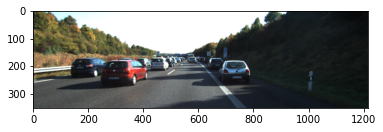

In [5]:
img = cv2.resize(cv2.imread("sample_image.png"), (1216, 352)) # Must be multiple of 32
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV loads images as BGR by default
plt.imshow(img)

/home/ruslan/.local/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


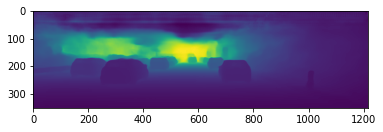

In [6]:
prediction = model.predict(img, is_channels_first=False, normalize=True) # Dont forget to normalize images
plt.imshow(prediction) # Reminder : plt.imshow() automatically scales the values, it does a good job but some libraries dont

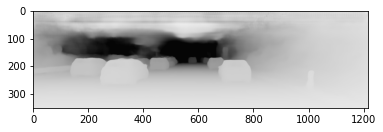

In [7]:
visual_depth_map = model.depth_map_to_rgbimg(prediction) # A helper method for converting depth maps into 3 channel, 8 byte images
# images 3 channel, uint8 format are displayed without any scaling / normalization
plt.imshow(visual_depth_map)